In [59]:
#!pip install matplotlib

In [9]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_colwidth = 20 # 각 열의 최대 출력 크기를 지정합니다.

## label 정보를 담은 pkl 파일 (label_type.pkl)

In [6]:
## label_type pkl 파일
path = "/opt/ml/input/data/label_type.pkl"
with open(path, "rb") as f: # rb: read binary
    label_type = pickle.load(f)
print("label 개수:", len(label_type))
print("label-logit 딕셔너리:\n", label_type)
print()

# label 문자열은 관계_없음, A:B 형식으로 존재합니다.
print("label: 관계_없음, A:B")
# A와 B의 종류를 살펴봅니다.
A = set()
B = set()
for label in label_type:
    if ":" in label:
        a, b = label.split(":")
        A.add(a)
        B.add(b)
print(f"label A: {len(A)} 종류", A)
print(f"label B: {len(B)} 종류", B)

label 개수: 42
label-logit 딕셔너리:
 {'관계_없음': 0, '인물:배우자': 1, '인물:직업/직함': 2, '단체:모회사': 3, '인물:소속단체': 4, '인물:동료': 5, '단체:별칭': 6, '인물:출신성분/국적': 7, '인물:부모님': 8, '단체:본사_국가': 9, '단체:구성원': 10, '인물:기타_친족': 11, '단체:창립자': 12, '단체:주주': 13, '인물:사망_일시': 14, '단체:상위_단체': 15, '단체:본사_주(도)': 16, '단체:제작': 17, '인물:사망_원인': 18, '인물:출생_도시': 19, '단체:본사_도시': 20, '인물:자녀': 21, '인물:제작': 22, '단체:하위_단체': 23, '인물:별칭': 24, '인물:형제/자매/남매': 25, '인물:출생_국가': 26, '인물:출생_일시': 27, '단체:구성원_수': 28, '단체:자회사': 29, '인물:거주_주(도)': 30, '단체:해산일': 31, '인물:거주_도시': 32, '단체:창립일': 33, '인물:종교': 34, '인물:거주_국가': 35, '인물:용의자': 36, '인물:사망_도시': 37, '단체:정치/종교성향': 38, '인물:학교': 39, '인물:사망_국가': 40, '인물:나이': 41}

label: 관계_없음, A:B
label A: 2 종류 {'인물', '단체'}
label B: 39 종류 {'자녀', '출생_도시', '구성원_수', '직업/직함', '기타_친족', '출신성분/국적', '자회사', '거주_국가', '주주', '제작', '부모님', '본사_도시', '사망_국가', '창립자', '형제/자매/남매', '사망_일시', '본사_주(도)', '별칭', '종교', '창립일', '용의자', '거주_도시', '배우자', '구성원', '상위_단체', '해산일', '거주_주(도)', '사망_도시', '출생_국가', '모회사', '동료', '소속단체', '사망_원인', '본사_국가', '정치/종교

## train data를 담은 tsv 파일 (train.tsv)  
(tsv: Tab Separated Values)

In [10]:
path = "/opt/ml/input/data/train/train.tsv"
df0 = pd.read_csv(path, delimiter="\t", header=None)
print("데이터 개수: ", df0.shape[0])

# 데이터를 전반적으로 살펴봅니다.
df = df0.iloc[:, 1:] # 0번째 컬럼은 쓸모없는 데이터이므로 제외합니다.
num_head = 10
pd.options.display.max_rows = num_head
df.head(num_head)

데이터 개수:  9000


,1,2,3,4,5,6,7,8
0,영국에서 사용되는 스포츠 유틸...,랜드로버,30,33,자동차,19,21,단체:제작
1,선거에서 민주당은 해산 전 의...,민주당,5,7,27석,42,44,관계_없음
2,유럽 축구 연맹(UEFA) 집...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,용병 공격수 챠디의 부진과 시...,강수일,24,26,공격수,3,5,인물:직업/직함
4,람캄행 왕은 1237년에서 1...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님
5,이와 관련해 AFCD는 대학 ...,OIE,33,35,전문가,19,21,관계_없음
6,신형 K5 사전계약 돌풍에 대...,기아자동차,18,22,K5,3,4,단체:제작
7,2008년 이전 팀명칭은 나고...,나고야 그램퍼스,14,21,토요타 자동차,58,64,단체:모회사
8,SW융합교육원 조영주 담당교수...,조선대학교,95,99,조영주,8,10,단체:구성원
9,김동양 NH투자증권 연구원은 ...,삼성SDS,17,21,10%,86,88,관계_없음


In [11]:
## 중복 데이터를 확인합니다.
# 문장, 개체1, 개체2, 관계가 모두 동일한 데이터의 수
print(df.loc[:, (1, 2, 5, 8)].duplicated().sum())

# 문장에서 개체들의 위치까지 동일한 데이터의 수
# - 개체의 의미가 위치에 따라 달라질 수 있으므로 포함하여 중복을 판단하도록 합니다.
# - 0번 컬럼을 제외하였으므로, df 전체에 대해 판단하면 됩니다.
print(df.duplicated().sum())

# 중복 데이터 제거
df.drop_duplicates(inplace= True)
# (1, 2, 5, 8) 컬럼에 대해서만 판단하려면 subset을 이용합니다. 
# df.drop_duplicates(subset=(1, 2, 5, 8), inplace= True)
print(df.duplicated().sum())

50
4
0


In [13]:
## 누락 데이터를 확인합니다.
#  - 첫번째 sum은 행 별로 수행합니다.
#  - sum(axis=1)이면 열 별로 수행합니다. (axis default = 0)
print(df.isna().sum().sum())

# 누락 데이터 제거
# - how="any": axis별로 na가 하나라도 있으면 drop (default)
df.dropna(how="any", inplace=True)

0


학습 문장 최대 길이: 510
학습 문장 평균 길이: 99.32469986660738


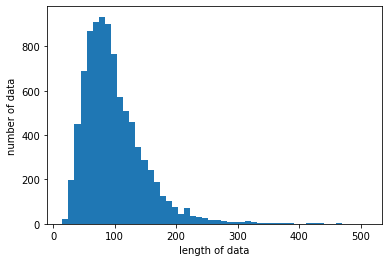

In [14]:
## 각 행의 문장 길이를 살펴봅니다.
isent, ient1, ient2 = 1, 2, 5

#학습 문장 길이 조사
print("학습 문장 최대 길이:", max(map(len, df[isent])))
print("학습 문장 평균 길이:", sum(map(len, df[isent])) / len(df[isent]))

plt.hist([len(s) for s in df[isent]], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()


In [26]:
for label, logit in label_type.items():
    print(logit, len(df[df[8] == label]))

0 4429
1 92
2 553
3 44
4 683
5 186
6 231
7 209
8 164
9 115
10 814
11 58
12 45
13 11
14 45
15 335
16 23
17 171
18 7
19 4
20 135
21 84
22 56
23 79
24 103
25 52
26 8
27 36
28 9
29 6
30 12
31 15
32 26
33 67
34 15
35 27
36 11
37 3
38 18
39 9
40 1
41 5


In [8]:
# 데이터가 적은 label 확인
for label, logit in label_type.items():
    if len(df[df[8] == label]) < 10:
        print(logit, len(df[df[8] == label]))

18 7
19 4
26 8
28 9
29 6
37 3
39 9
40 1
41 5


## test data를 담은 tsv 파일 (test.tsv)

In [27]:
path = "/opt/ml/input/data/test/test.tsv"
dataset = pd.read_csv(path, delimiter="\t", header=None)
print("데이터 개수: ", dataset.shape[0])
dataset.head()

데이터 개수:  1000


,0,1,2,3,4,5,6,7,8
0,wikipedia-15133-...,"이은주의 첫 영화로, 그녀가 ...",이은주,0,2,감독,45,46,blind
1,wikitree-10241-0...,경성대학교(총장 송수건) 미술...,경성대학교,0,4,송수건,9,11,blind
2,wikipedia-24909-...,하더라도 만일 그녀의 아들에게...,에드워드 3세,83,89,이사벨라,45,48,blind
3,wikitree-29775-2...,정성으로 담근 700포기의 김...,새마을부녀회,38,43,김치,17,18,blind
4,wikipedia-20874-...,노트북은 이들 정부에 판매될 ...,정부,8,9,한 명,30,32,blind
